## **<center>From Raw to Reliable: Cleaning the London Airbnb Dataset</center>**
### **<center>Data Cleaning Project</center>**




---

## Executive Summary

This project outlines a comprehensive data cleaning and preparation workflow applied to the London Airbnb listings dataset. The goal was to transform a large, raw, and structurally inconsistent dataset into a reliable analytical asset for exploratory analysis, modeling, and business insights.

The original dataset included 96,871 rows and 79 columns, with mixed data types, extensive missing values, unstructured text fields, extreme outliers, and high-cardinality variables. Through a structured process—data validation, type correction, column reduction, deduplication, outlier handling, and feature standardization—the dataset was refined to 96,862 rows and 68 analytically useful columns. Memory usage was reduced by roughly 65%, improving computational efficiency.

Rather than relying on one-size-fits-all cleaning rules, decisions were guided by domain knowledge and analytical relevance. Missing values were handled based on semantic meaning, outliers were treated using domain-informed thresholds and logical consistency checks, and categorical features were refined to improve interpretability. This approach preserved real-world market variation while removing noise and inconsistencies.

Overall, the project demonstrates a thoughtful, decision-driven approach to data cleaning that prioritizes data integrity, analytical usability, and transparency.

## Table of contents

1. Introduction

2. Uploading Dataset

3. Dataset Overview

4. Schema and Structural Normalization

   4.1. Fixing Data Type
   
   4.2. Removing Columns with zero content

6. Removal of Non-Informative and Redundant Columns

7. Deduplication and Data Profiling
   
    6.1. Missing Values Treatment
   
    6.2. Dropping NUll Column

    6.3. Distribution Stats

    6.4. Outlier thresholds

    6.5. Cardinality

8. Null Handing

9. Value Standardization and Corrections

10. Outlier Detection Treatment

11. Validation and Dataset Integrity Checks

12. Conclusion

13. References


## 1. Introduction

Data cleaning is a foundational step in any analytical workflow, especially when working with large, real-world datasets. Public datasets like Airbnb listings often combine structured and unstructured information, inconsistent data types, missing values, and extreme observations. As a result, they reflect both genuine market behavior and underlying data quality issues.

This project focuses on cleaning and preparing the London Airbnb listings dataset to produce a high-quality, analysis-ready resource. The emphasis goes beyond technical transformations to include thoughtful, domain-informed decision-making. Rather than removing data indiscriminately, each cleaning step considers whether a value represents noise, missing information, or a meaningful signal about host behavior, listing performance, or market structure.

By the end of the process, the dataset preserves the complexity of the London Airbnb market while removing distortions that could undermine analysis. The outcome is a transparent and well-documented data cleaning pipeline.

## 2. Uploading Dataset

In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", 100)

url = "https://data.insideairbnb.com/united-kingdom/england/london/2025-09-14/data/listings.csv.gz"

listings = pd.read_csv(url)

## 3. Dataset Overview

In [145]:
print('=== SHAPE OF DATASET ===')
row, col = listings.shape; print(f"Rows: {row}"), print(f"Columns: {col}")
print(f"Memory Usage:{listings.memory_usage(deep=True).sum() /1024**2:.2f} MB")

print('_'*100)
print("Data Validation Summary".center(100))
print("_"*100)

summary = pd.DataFrame({
    'DataType': listings.dtypes,
    'Non-Null': listings.count(),
    'Null': listings.isnull().sum(),
    'Null%': (listings.isnull().sum() / len(listings) * 100).round(2),
    'Unique': listings.nunique(),
    'Duplicates': listings.duplicated().sum()
})

pd.set_option("display.max_rows", 100)
summary

=== SHAPE OF DATASET ===
Rows: 96871
Columns: 79
Memory Usage:394.52 MB
____________________________________________________________________________________________________
                                      Data Validation Summary                                       
____________________________________________________________________________________________________


,DataType,Non-Null,Null,Null%,Unique,Duplicates
id,int64,96871,0,0.00,96871,0
listing_url,object,96871,0,0.00,96871,0
scrape_id,int64,96871,0,0.00,1,0
last_scraped,object,96871,0,0.00,5,0
source,object,96871,0,0.00,2,0
name,object,96871,0,0.00,93340,0
description,object,94421,2450,2.53,83379,0
neighborhood_overview,object,41208,55663,57.46,33388,0
picture_url,object,96865,6,0.01,94609,0
host_id,int64,96871,0,0.00,55646,0


## 4. Schema And Structural Normalization

#### 4.1. Fixing data types

**Before**

From object data type to proper date data type

In [146]:
pd.DataFrame(listings[[
    "host_since",
    "last_scraped",
    "calendar_last_scraped",
    "first_review",
    "last_review"
]].dtypes)

,0
host_since,object
last_scraped,object
calendar_last_scraped,object
first_review,object
last_review,object


In [147]:
listings[[
    "host_since",
    "last_scraped",
    "calendar_last_scraped",
    "first_review",
    "last_review"
]] = listings[[
    "host_since",
    "last_scraped",
    "calendar_last_scraped",
    "first_review",
    "last_review"
]].apply(pd.to_datetime, errors='coerce')

**After**

In [148]:
pd.DataFrame(listings[[
    "host_since",
    "last_scraped",
    "calendar_last_scraped",
    "first_review",
    "last_review"
]].dtypes)

,0
host_since,datetime64[ns]
last_scraped,datetime64[ns]
calendar_last_scraped,datetime64[ns]
first_review,datetime64[ns]
last_review,datetime64[ns]


---

**Before**

* There are some columns that stored as object but they are actually booleans. Therefore, we convert them to proper booleans.


In [149]:
listings[['host_is_superhost',
                'host_has_profile_pic',
                'host_identity_verified',
                'has_availability',
                'instant_bookable']].head(2)

,host_is_superhost,host_has_profile_pic,host_identity_verified,has_availability,instant_bookable
0,t,t,t,t,f
1,f,t,t,t,f


**After**

In [150]:
listings.head(3)

boolean_cols = ['host_is_superhost',
                'host_has_profile_pic',
                'host_identity_verified',
                'has_availability',
                'instant_bookable']
for bool_col in boolean_cols:
    listings[bool_col] = (listings[bool_col]
                         .map({'t': True, 'f': False})
                         .astype('boolean'))

In [151]:
listings[['host_is_superhost',
                'host_has_profile_pic',
                'host_identity_verified',
                'has_availability',
                'instant_bookable']].head(2)

,host_is_superhost,host_has_profile_pic,host_identity_verified,has_availability,instant_bookable
0,True,True,True,True,False
1,False,True,True,True,False


---

**Before**

The Price column is currently stored as an object dtype. Since the nature of price data is numeric, we will convert it to facilitate pricing analysis, revenue estimation, and modeling. Moreover, the values contain unnecessary dollar signs, which we will remove as well.

In [152]:
listings.price.head(2)

0     $70.00
1    $149.00
Name: price, dtype: object

**After**

In [153]:
listings['price'] = (
    listings['price']
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
    .astype(float)    

)

In [154]:
listings.price.head(2)

0     70.0
1    149.0
Name: price, dtype: float64

---

**Before**

The percentage columns are currently stored as objects—typically strings. Rather than converting them now, we'll keep them as-is for the moment. Next, we'll strip out those percentage signs (%) so we can properly identify the values and move forward with analysis.

In [155]:
listings[['host_response_rate','host_acceptance_rate']].head(1)

,host_response_rate,host_acceptance_rate
0,100%,96%


**After**

In [156]:
rate_cols = ['host_response_rate','host_acceptance_rate']
for col in rate_cols:
    listings[col] = (listings[col]
                    .str.replace("%", "", regex=False)
                    .astype(float)
                    )

In [157]:
listings[['host_response_rate','host_acceptance_rate']].head(1)

,host_response_rate,host_acceptance_rate
0,100.0,96.0


---

#### 4.2. Removing columns with zero content

**Before**

These two columns *license, neighbourhood_group_cleansed* have zero content. Since they have no analytical content, we will remove them.

In [158]:
listings[['license', 'neighbourhood_group_cleansed']].sum()

license                         0.0
neighbourhood_group_cleansed    0.0
dtype: float64

**After**

In [159]:
listings.drop(columns=['license', 'neighbourhood_group_cleansed']
              , inplace=True)

## 5. Removal of Non-informative Columns

* This dataset consists of 96871 rows and 77 columns. This number of columns are huge and vast majority of them have no analytical values in further data analysis. Therefore, as the first step, we remove many of them.
* The following columns offer little to no analytical value because they do not contain structured, quantitative, or behaviorally informative signals that explain variation in outcomes such as price, demand, availability, or review performance. Identifiers and URLs like id, listing_url, host_url, and picture_url serve only as unique references or navigation links. While useful for data management and joins, they do not capture intrinsic characteristics of listings or hosts.

* Long free-text fields such as description, host_about, and neighborhood_overview are unstructured and cannot be directly used in statistical or econometric analysis without extensive natural language processing. In their raw form, they tend to introduce noise rather than explanatory power. Similarly, static metadata like source and calendar_updated reflects system-level information rather than market behavior and adds little analytical insight. Image URLs such as host_picture_url and host_thumbnail_url also lack numeric or categorical content and only become useful under advanced computer vision approaches. As a result, these columns are typically excluded from exploratory analysis and modeling.

In [160]:
def drop_cols(df):
    return df.drop(columns=['scrape_id', 'id', 'listing_url', 'host_url', 
                                  'picture_url', 'description', 'host_about',
                                  'neighborhood_overview', 'source', 'calendar_updated', 
                                  'host_picture_url', 'host_thumbnail_url'
                           ])

listings = drop_cols(listings)


In [161]:
print("=== CURRENT DATASET SHAPE ===")
row, col = listings.shape
print(f"Rows: {row}")
print(f"Columns: {col}")

=== CURRENT DATASET SHAPE ===
Rows: 96871
Columns: 65


## 6. Duplication And Data Profiling

**Before**

In [162]:
print(f"There are {listings.duplicated().sum()} duplicated values in dataframe.")

There are 9 duplicated values in dataframe.


**After**

In [163]:
def drop_dup(df):
    return df.drop_duplicates(keep='first')
listings = drop_dup(listings)

In [164]:
print(f"There are {listings.duplicated().sum()} duplicated values in dataframe.")

There are 0 duplicated values in dataframe.


----

In [165]:
null_pct = (
    listings.isna()
    .sum()
    .sum() * 100 / listings.size
)
print(f"Null cells: {null_pct:.2f}%")

Null cells: 9.87%


### 6.1. Missing Value Treatment


* Percentage-wise, approximately 10% of the dataset contains null values, distributed across 35 columns. Rather than applying a blanket rule to drop all columns with missing values, missing data were handled based on semantic meaning and analytical relevance.

* Columns *host_neighbourhood* and *neighbourhood* were removed because they contain over 50% missing values and provide limited analytical value. In addition, *host_location* was dropped because it exhibits substantial missingness and weak predictive utility for modeling.

* All remaining columns were retained despite containing null values, as they continue to offer meaningful analytical signal. In particular, *first_review*, *last_review*, and all *review_scores_* variables were preserved. In these cases, null values do not represent missing data but rather indicate listings with no reviews, which is itself an informative state reflecting listing maturity and demand.

* Similarly, structural property variables such as bathrooms, bathrooms_text, bedrooms, and beds were retained despite missing values, as they are core determinants of pricing and listing capacity and possess strong explanatory power.

* Host-related performance variables including *host_is_superhost*, *host_response_time*, *host_response_rate*, and *host_acceptance_rate* were also kept. Missing values in these columns typically arise from new or inactive hosts and therefore convey meaningful information related to trust, conversion, and host performance.

* Finally, the *price* variable contains missing values but was retained due to its central importance to the analysis. Rows with missing prices will be excluded only in analysis-specific contexts where price is required, rather than being removed globally.

### 6.2. Dropping Null Column

**Before**

* Dropping column with high number of nulls and weak analytical values.

In [166]:
row, col = listings.shape
print(f"Rows: {row}")
print(f"Columns: {col}")

Rows: 96862
Columns: 65


In [167]:
def drop_col(df):
    return df.drop(columns=['host_neighbourhood',
                            'neighbourhood',
                            'host_location']
                  )
listings = drop_col(listings)

In [168]:
row, col = listings.shape
print(f"Rows: {row}")
print(f"Columns: {col}")

Rows: 96862
Columns: 62


### 6.3. Distribution Stats

Due to the number of core analytical variables, distributional analysis was organized into five thematic groups—pricing, capacity, availability, reviews, and Maximum Nights Stay — to improve interpretability and maintain clarity.

**Chart 1: Pricing and Revenue Distribution**

In [169]:
chart1 = listings[['price', 
           'estimated_revenue_l365d', 
           'estimated_occupancy_l365d'
          ]]

chart1.describe().round(2)

,price,estimated_revenue_l365d,estimated_occupancy_l365d
count,61955.00,61955.00,96862.00
mean,229.94,10474.84,46.00
std,4437.88,66128.46,74.93
min,7.00,0.00,0.00
25%,77.00,0.00,0.00
50%,135.00,2970.00,0.00
75%,221.00,12250.00,60.00
max,1085147.00,10150000.00,255.00


* The distribution of *price*, *estimated_revenue_l365d*, and *estimated_occupancy_l365d* points to a highly skewed Airbnb market in London with a small number of extreme listings. Nightly prices cluster around the lower end, with a median of £135 and 75% of listings priced below £221. The mean rises to £230 after being pulled up by a handful of extreme outliers, including prices exceeding over £1 million per night.

* A similar pattern shows up in estimated revenue. Although the mean annual revenue is £10,475, half of the listings earn less than £2,970 per year and 25% generate no revenue at all. Estimated occupancy further backs this up, with a median of zero days and an interquartile range from 0 to 60 days. It suggests that a large portion of listings either receive no bookings or drop out of the market. However, a small subset of highly active listings stand out, reaching up to 255 booked days per year and generating revenues slightly above £10 million.

* Overall, these distributions boil down to a market where typical listings operate at low utilization and modest prices, while a small group of high-performing outliers skew the averages upward.

**Chart 2: Capacity and Structure**

In [170]:
chart2 = listings[['accommodates',
                   'bedrooms',
                   'bathrooms',
                   'beds'
                  ]]
chart2.describe().round(2)

,accommodates,bedrooms,bathrooms,beds
count,96862.00,84087.00,62017.00,61943.00
mean,3.33,1.61,1.35,1.95
std,2.08,1.04,0.72,1.44
min,1.00,0.00,0.00,0.00
25%,2.00,1.00,1.00,1.00
50%,2.00,1.00,1.00,2.00
75%,4.00,2.00,1.50,2.00
max,16.00,50.00,26.00,50.00


* The distribution of *accommodates*, *bedrooms*, *bathrooms*, and *beds* shows that most Airbnb listings in London are set up for small groups. On average, listings accommodate about three guests, but the median value is only two, which points to a market dominated by studios and one-bedroom property. 
* This pattern carries through to *bedrooms* and *bathrooms*, where half of the listings have just one bedroom and one bathroom. This pattern reinforces the idea that compact living spaces make up the core of supply. Beds follow a similar trend, with most listings offering one or two beds, enough for short stays. However, a small number of extreme values stand out, such as listings with up to 50 bedrooms or beds, which likely represent hostels or multi-unit properties and push up the averages.
* Overall, these figures boil down to a market where typical listings are modest in size, while a few unusually large properties skew the distribution.

**Chart 3: Availability and Demand**

In [171]:
chart3 = listings[['availability_30',
                   'availability_60',
                   'availability_90',
                   'availability_365'
                  ]]
chart3.describe().round(2)

,availability_30,availability_60,availability_90,availability_365
count,96862.00,96862.00,96862.00,96862.00
mean,9.38,22.26,36.15,144.91
std,11.05,23.20,35.83,141.80
min,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00
50%,4.00,15.00,29.00,96.00
75%,18.00,45.00,73.00,288.00
max,30.00,60.00,90.00,365.00


* In the short term, availability leans toward the lower end, with a median of only 4 days in the next 30 days and 15 days over the next 60 days. Thus, it suggests that many listings are either already booked or temporarily unavailable.
* This pattern carries over to the 90-day window, where half of the listings have fewer than 29 available days. Over the full year, availability opens up more clearly, with a median of 96 days, but a quarter of listings still show zero availability. At the other end, some listings stand out with full availability, reaching the maximum of 365 days, which may reflect new, inactive, or intentionally unbooked properties.
* Overall, these results show that many listings are heavily booked or restricted in the short term, while others drop off and remain largely unused. Therefore, it highlights strong differences in host activity and demand.

**Chart 4: Reviews and Engagement**

In [172]:
chart4 = listings[['number_of_reviews',
                   'reviews_per_month',
                   'number_of_reviews_ltm',
                   'review_scores_rating'
                  ]]
chart4.describe().round(2)

,number_of_reviews,reviews_per_month,number_of_reviews_ltm,review_scores_rating
count,96862.00,72749.00,96862.00,72749.00
mean,21.66,0.99,5.71,4.68
std,50.37,1.30,12.00,0.49
min,0.00,0.01,0.00,0.00
25%,1.00,0.15,0.00,4.58
50%,5.00,0.52,0.00,4.83
75%,20.00,1.29,6.00,5.00
max,1902.00,36.96,390.00,5.00


* The review-related variables show how guest activity and perceived quality play out across listings. They highlight strong differences between typical and highly active properties. Most listings have picked up only a small number of reviews, with a median of five total reviews and just over half receiving no reviews in the last twelve months. This could suggest that many listings are either new, inactive, or booked only occasionally.
* Reviews per month back this up, as the median value is 0.52. It indicates that regular review activity is limited for most hosts. At the same time, a small group of listings stand out, accumulating hundreds or even thousands of reviews and posting very high monthly review rates.
*  Review scores, however, cluster tightly at the top of the scale, with most ratings between 4.6 and 5.0, showing generally high guest satisfaction among reviewed listings.
*  Overall, these patterns boil down to a market where review volume varies widely. Ratings remain consistently strong.

**Chart 5: Maximum Nights Stay**

In [173]:
chart5 = listings[['maximum_nights', 
                   'minimum_maximum_nights',
                   'maximum_maximum_nights',
                   'maximum_nights_avg_ntm']]
chart5.describe()

,maximum_nights,minimum_maximum_nights,maximum_maximum_nights,maximum_nights_avg_ntm
count,9.686200e+04,9.685900e+04,9.685900e+04,9.686200e+04
mean,6.065541e+03,6.149096e+03,2.944012e+05,2.921355e+05
std,1.686962e+06,1.686987e+06,2.493444e+07,2.474059e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,6.000000e+01,9.000000e+01,9.900000e+01,9.900000e+01
50%,3.650000e+02,3.650000e+02,3.650000e+02,3.650000e+02
75%,7.300000e+02,1.125000e+03,1.125000e+03,1.125000e+03
max,5.248556e+08,5.248556e+08,2.147484e+09,2.135717e+09


* Several stay-length constraint variables exhibited extremely large values which are far beyond any realistic booking. These values likely represent system placeholders indicating the absence of an upper limit rather than true constraints. In the next section, we will treat them as invalid and set them to null to prevent distortion of distributions and downstream analysis.

### 6.4. Outlier thresholds

***price***

**Before**

In [174]:
print(f" Minimum Price: {listings.price.min()}")
print(f" Mean Price:    {listings.price.mean().round(2)}")
print(f" Maximum Price: {listings.price.max()}")

 Minimum Price: 7.0
 Mean Price:    229.94
 Maximum Price: 1085147.0


* The distribution of price shows a highly skewed Airbnb market in London. Therefore, we will drop the outliers and range them £20–£10,000 per night.

**After**

In [175]:
listings.loc[
    (listings["price"] < 20) | (listings["price"] > 10000),
    "price"
] = np.nan


print('New Price Range')
print(f" Minimum Price: {listings.price.min()}")
print(f" Mean Price:    {listings.price.mean().round(2)}")
print(f" Maximum Price: {listings.price.max()}")


New Price Range
 Minimum Price: 20.0
 Mean Price:    199.37
 Maximum Price: 10000.0


* Nightly prices outside the £20–£10,000 range were treated as outliers. Values above this range are not consistent with realistic Airbnb nightly rates. They are likely the result of data entry errors or misreported pricing units. Therefore, we removed these observations.

**Before**

*estimated_revenue_l365d*

In [176]:
pd.DataFrame(
    listings.estimated_revenue_l365d
    .describe()
    .round(2)
)

,estimated_revenue_l365d
count,61955.00
mean,10474.84
std,66128.46
min,0.00
25%,0.00
50%,2970.00
75%,12250.00
max,10150000.00


**After**

In [177]:
listings.loc[
    listings["estimated_revenue_l365d"] > 2000000,
    "estimated_revenue_l365d"
] = np.nan

pd.DataFrame(
    listings.estimated_revenue_l365d
    .describe()
    .round(2)
)

,estimated_revenue_l365d
count,61950.00
mean,10002.11
std,24732.68
min,0.00
25%,0.00
50%,2970.00
75%,12249.25
max,1853292.00


* The maximum of the annual revenue show over 10 million. It seems unrealistic in Airbnb market. Therefore, we tread them as outliers and remove them by making a range from 0 to £2 million annual revenue. That's because only a small number of estimated annual revenue exceeding £2 million.

**Before**

*accommodates, bedrooms, bathrooms, and beds**


In [178]:
(
    listings[listings['bedrooms'] >25] 
    [['accommodates' ,'bedrooms' ,'bathrooms', 'bathrooms_text', 'beds']]
)

,accommodates,bedrooms,bathrooms,bathrooms_text,beds
58687,2,50.0,NaN,NaN,NaN
69028,1,30.0,NaN,1 private bath,NaN
69467,16,50.0,15.0,15 baths,50.0
83401,2,30.0,NaN,30 baths,NaN


**After**

In [179]:
mask = (
    (listings['bedrooms'] > 25) &
    (
        listings['bathrooms'].isna() |
        listings['bathrooms_text'].str.contains('1 bath|shared', case=False, na=False)
    )
)

listings.loc[mask, 'bedrooms'] = np.nan


In [180]:
(
    listings.loc[mask, ['accommodates' ,'bedrooms' ,'bathrooms', 'bathrooms_text', 'beds']]
)

,accommodates,bedrooms,bathrooms,bathrooms_text,beds
58687,2,NaN,NaN,NaN,NaN
69028,1,NaN,NaN,1 private bath,NaN
83401,2,NaN,NaN,30 baths,NaN


* A small number of listings show unusually high bedroom counts (above 25) that are not supported by corresponding bathroom availability (e.g., 30 bedrooms with only one bathroom). These inconsistencies suggest data anomalies rather than valid listings. Therefore, the affected bedroom values were replaced with NaN instead of removing the entire rows.

**Before**

*number_of_reviews, reviews_per_month, number_of_reviews_ltm, review_scores_rating*

In [181]:
(
listings[['review_scores_rating']]
    .describe()
    .round(2)
)

,review_scores_rating
count,72749.00
mean,4.68
std,0.49
min,0.00
25%,4.58
50%,4.83
75%,5.00
max,5.00


**After**

In [182]:
def replace_zero(df):
    df = df.copy()
    df['review_scores_rating'] = df['review_scores_rating'].replace(0, np.nan)
    return df

listings = replace_zero(listings)

In [183]:
(
listings[['review_scores_rating']]
    .describe()
    .round(2)
)

,review_scores_rating
count,72746.00
mean,4.68
std,0.49
min,1.00
25%,4.58
50%,4.83
75%,5.00
max,5.00


* Review activity is uneven across listings, with most receiving only a small number of reviews and a much smaller group accumulating very high counts. These large values are expected and reflect highly active listings rather than true anomalies. Review scores are generally clustered near the maximum, and values recorded as zero were interpreted as missing and adjusted to avoid misrepresenting listing quality.

* Once zero values were treated as missing, review scores fell entirely within Airbnb’s valid rating range and showed a strong concentration near the upper end. This pattern reflects generally high guest satisfaction across listings, with relatively limited variation among rated properties.

**Before**

*host_response_rate*

In [184]:
(
    listings[['host_response_rate']]
    .describe()
    .round(2)
)

,host_response_rate
count,65156.00
mean,90.35
std,23.27
min,0.00
25%,95.00
50%,100.00
75%,100.00
max,100.00


**After**

In [185]:
def mask_hrr(df):
    df = df.copy()
    df['host_response_rate'] = df['host_response_rate'].replace(0, np.nan)
    return df
listings = mask_hrr(listings)

In [186]:
pd.DataFrame(
    listings['host_response_rate'].describe()
)

,host_response_rate
count,62718.000000
mean,93.861077
std,15.265194
min,3.000000
25%,97.000000
50%,100.000000
75%,100.000000
max,100.000000


* A small share of listings (~3.7%) report a *host_response_rate* of 0. In this dataset, zero values likely indicate missing or unavailable response history rather than true non-response. To avoid biasing summary statistics and models, these values were masked to NaN and treated as missing. The resulting distribution is more consistent with expected host behavior on Airbnb.
* We checked the extreme low values and found that the 3% response rate belongs to the same host across two listings, which makes it likely to be real behavior. For that reason, low non-zero values were kept, and only zeros were treated as missing.

**Before**

*maximum_nights, minimum_maximum_nights, maximum_maximum_nights, maximum_nights_avg_ntm*

In [187]:
listings[[
    "maximum_nights",
    "minimum_maximum_nights",
    "maximum_maximum_nights",
    "maximum_nights_avg_ntm"
]].describe()

,maximum_nights,minimum_maximum_nights,maximum_maximum_nights,maximum_nights_avg_ntm
count,9.686200e+04,9.685900e+04,9.685900e+04,9.686200e+04
mean,6.065541e+03,6.149096e+03,2.944012e+05,2.921355e+05
std,1.686962e+06,1.686987e+06,2.493444e+07,2.474059e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,6.000000e+01,9.000000e+01,9.900000e+01,9.900000e+01
50%,3.650000e+02,3.650000e+02,3.650000e+02,3.650000e+02
75%,7.300000e+02,1.125000e+03,1.125000e+03,1.125000e+03
max,5.248556e+08,5.248556e+08,2.147484e+09,2.135717e+09


**After**

In [188]:
night_cols = [
    "maximum_nights",
    "minimum_maximum_nights",
    "maximum_maximum_nights",
    "maximum_nights_avg_ntm"
]

for col in night_cols:
    listings.loc[listings[col] > 3650, col] = np.nan

In [189]:
listings[[
    "maximum_nights",
    "minimum_maximum_nights",
    "maximum_maximum_nights",
    "maximum_nights_avg_ntm"
]].describe().round(2)

,maximum_nights,minimum_maximum_nights,maximum_maximum_nights,maximum_nights_avg_ntm
count,96858.00,96855.00,96842.00,96845.00
mean,450.72,534.10,560.28,551.07
std,415.28,450.92,449.89,446.18
min,1.00,1.00,1.00,1.00
25%,60.00,90.00,99.00,99.00
50%,365.00,365.00,365.00,365.00
75%,730.00,1125.00,1125.00,1125.00
max,2000.00,2000.00,3000.00,2444.10


* All these variables *maximum_nights, minimum_maximum_nights, maximum_maximum_nights, maximum_nights_avg_ntm* have extremely large values. At this stage, we set them to NaN those over 10 years stay which is the realistic upper bound and all other observations were retained.

### 6.5. Cardinality

**Before**

*host_listings_count*

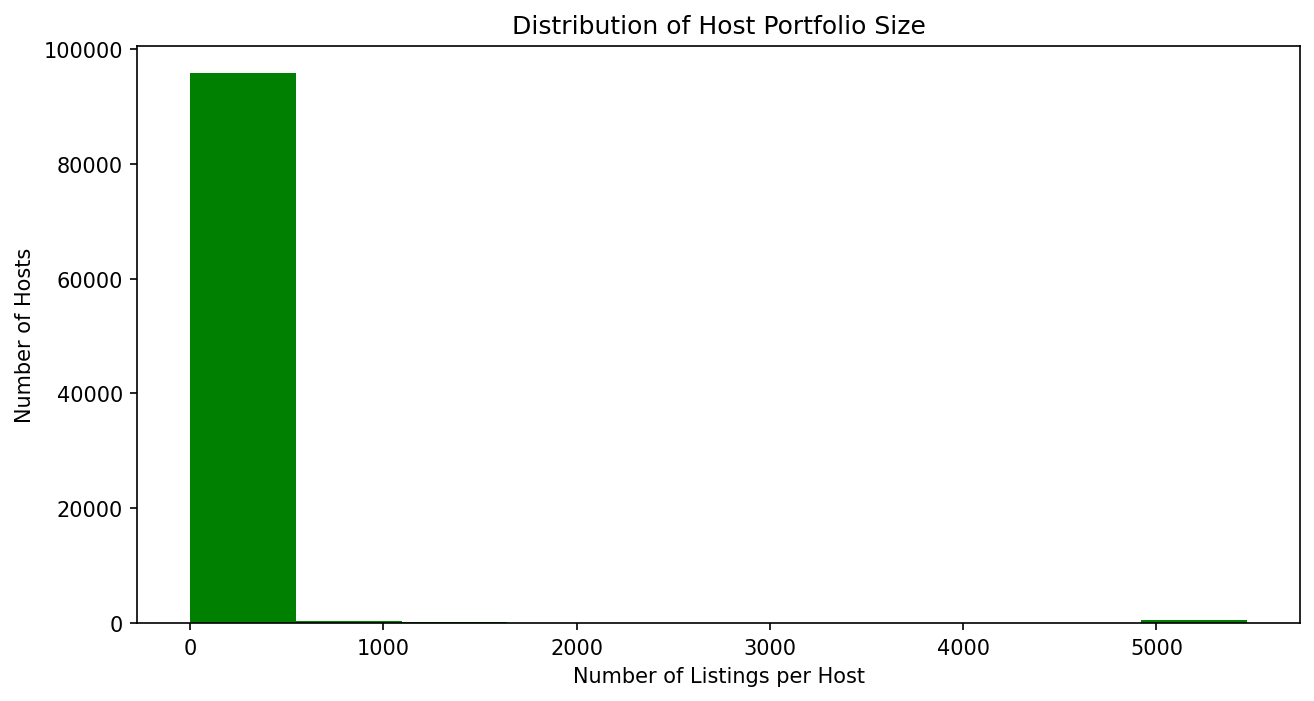

Distribution of host_listings_count
Minimum: 1.0
Maximum: 5469.0


In [190]:
plt.figure(figsize=(10,5), dpi=150)
plt.hist(listings.host_listings_count, color='green')
plt.title('Distribution of Host Portfolio Size')
plt.xlabel("Number of Listings per Host")
plt.ylabel("Number of Hosts")
plt.show()

print("Distribution of host_listings_count")
print(f"Minimum: {listings.host_listings_count.min()}"),
print(f"Maximum: {listings.host_listings_count.max()}")


* The graph shows that *host_listings_count* enjoys some extreme outliers. However, they represent the real-world and important segment of the Airbnb market. They could belong to property management companies, professional short-term rental operators or even multi-unit landlords. Therefore, we will not drop them. That's because droppting them would bias results toward casual hosts, distort pricing, and availability patterns.
* Instead we keep them, but treat them carefully by categorize them in a new column.


**After**

In [191]:
bins = [0, 1, 5, 20, 100, np.inf]
labels = ["single", "small", "medium", "large", "enterprise"]
listings["host_size"] = pd.cut(listings["host_listings_count"], bins=bins, labels=labels)


* Enterprise are those with over 100 hosts

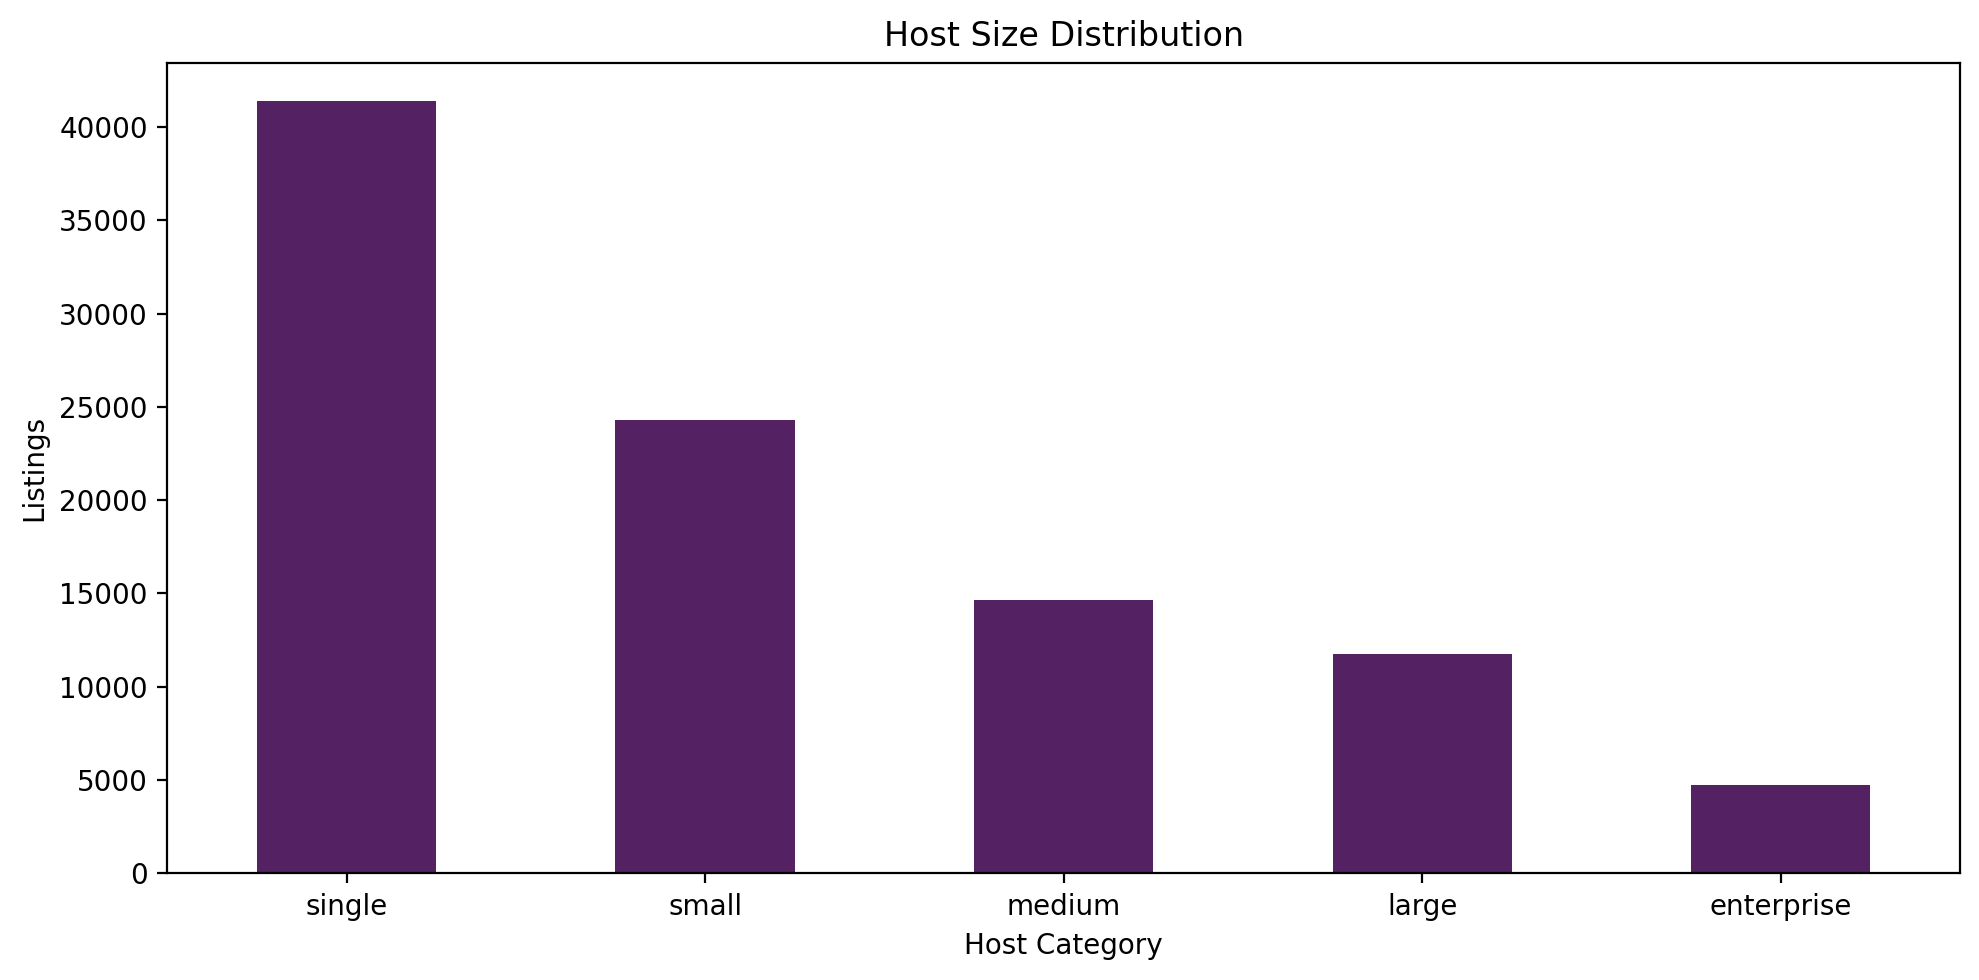

In [192]:
plt.rcParams['figure.dpi']=200
(listings.host_size.value_counts().plot(kind='bar', color='#542162', figsize=(10,5)))
plt.title('Host Size Distribution')
plt.xlabel('Host Category')
plt.ylabel('Listings')
plt.xticks(rotation=0)
plt.tight_layout()


* Given the extreme skewness and high cardinality of *host_listings_count*, hosts were grouped into size-based categories representing individual, small-scale, and professional operators. This transformation improves interpretability and allows clearer comparison of hosting behavior across market segments.

**Before**

In [193]:
pd.DataFrame(
    listings.accommodates.describe()
)

,accommodates
count,96862.000000
mean,3.326351
std,2.078663
min,1.000000
25%,2.000000
50%,2.000000
75%,4.000000
max,16.000000


* Categorizing the accommodation based on size

**After**

In [194]:
labels = ['solo', 'couple', 'small group', 'medium group', 'large group']
bins = [0, 2, 4, 6, 9, np.inf] 

listings['accommodates_cat'] = pd.cut(listings['accommodates'], bins=bins
                                                              , labels=labels)

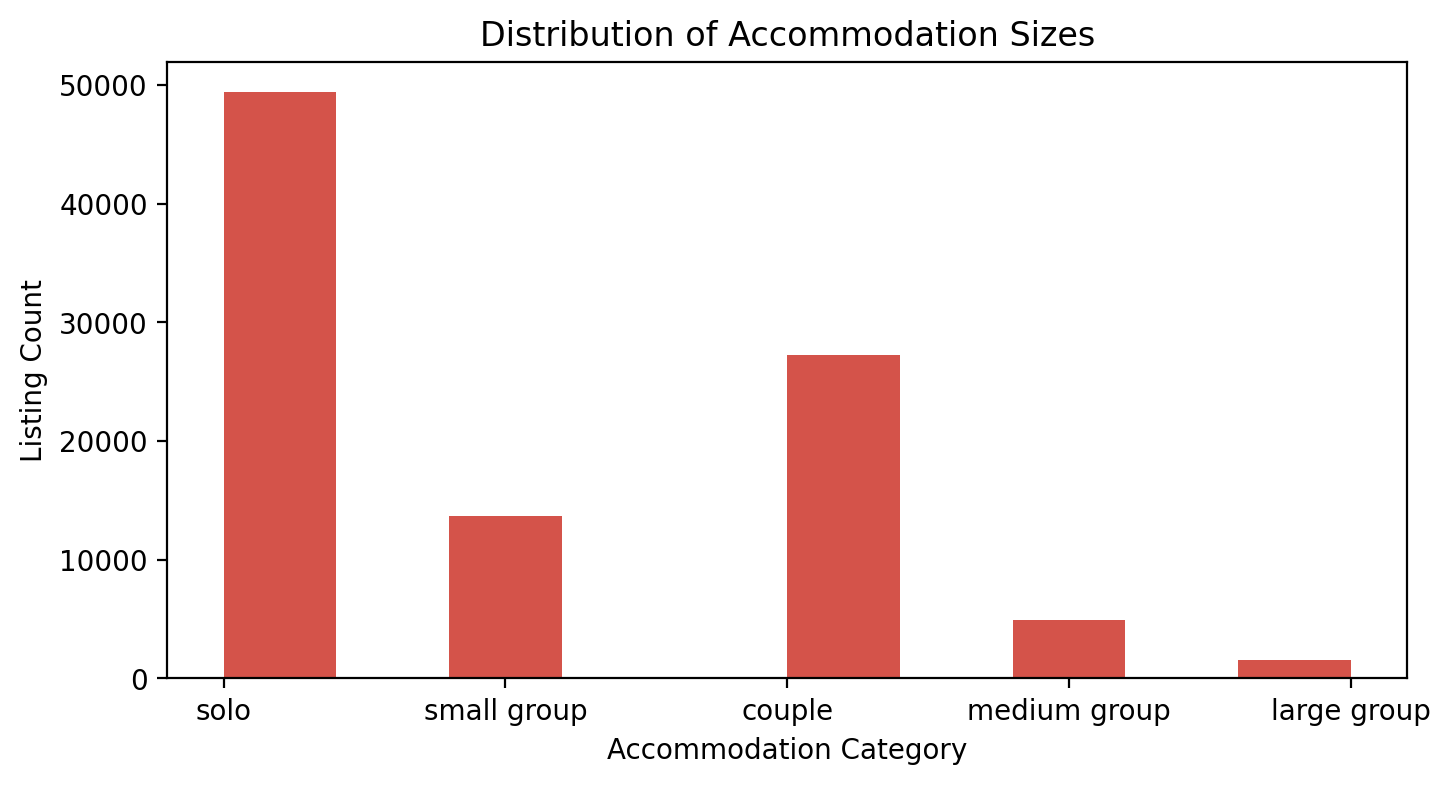

In [195]:
plt.figure(figsize=(8,4), dpi=200)
plt.hist(listings.accommodates_cat, color='#d4534a')
plt.title('Distribution of Accommodation Sizes')
plt.xlabel('Accommodation Category')
plt.ylabel('Listing Count')
plt.show()

* Accommodates is a numeric variable, but its analytical meaning is ordinal/segment-based rather than continuous. For better interpretation and readability, we categorized it from 'solo' to 'large group' based on multiple capacity levels.

**Before**

*bedrooms*

In [196]:
pd.DataFrame(
    listings.bedrooms.describe()
)

,bedrooms
count,84084.000000
mean,1.605906
std,1.017630
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,50.000000


* Categorizing the number of bedrooms

**After**

In [197]:
def categorizing(df):
    labels = ['studio/1-bed', '2-bed', 'family-sized', 'large']
    bins =  [0, 2, 3, 5, np.inf]
    df = df.copy()
    df['bedroom_cat'] = pd.cut(df['bedrooms'], bins=bins, labels=labels) 
    return df
listings = categorizing(listings)

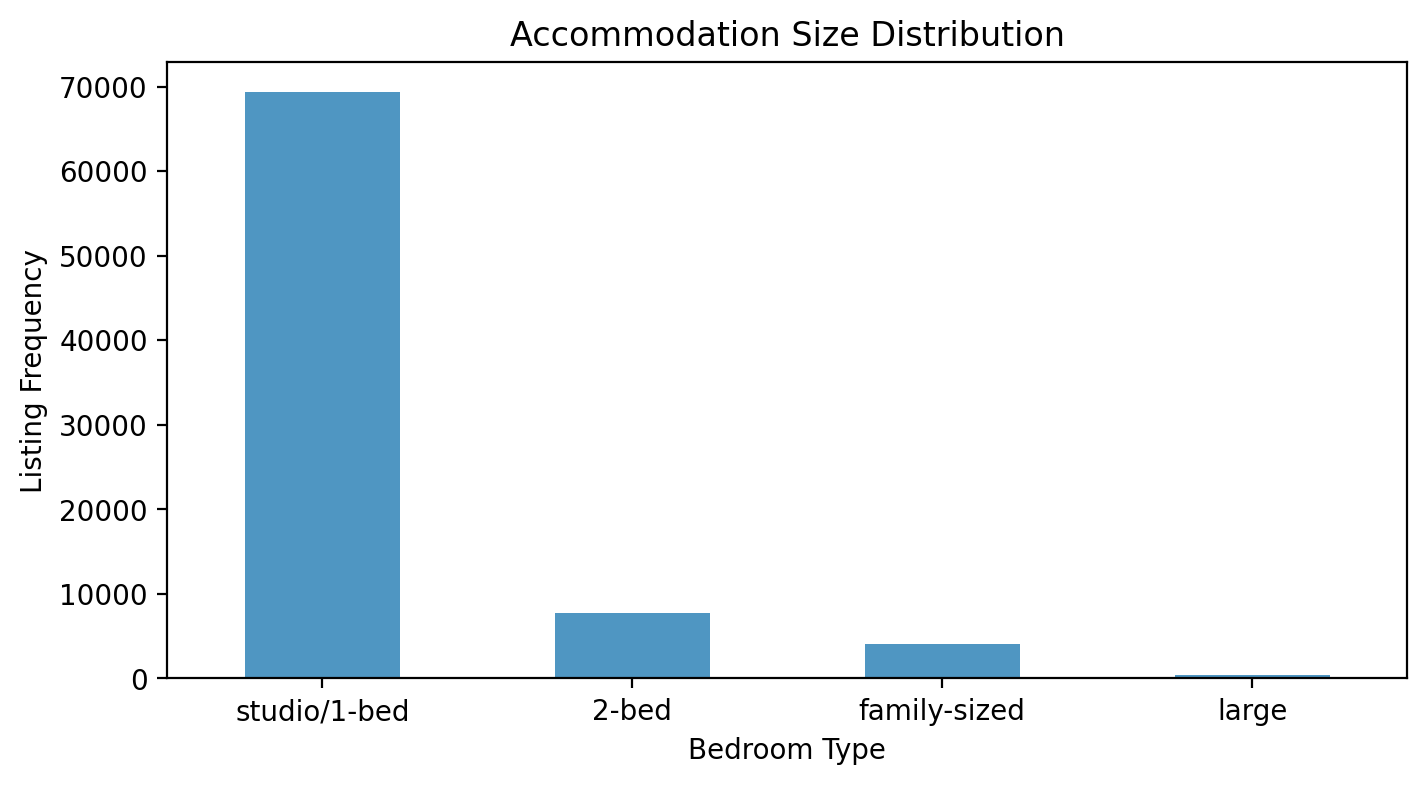

In [198]:
plt.rcParams['figure.dpi'] = 200
listings['bedroom_cat'].value_counts().plot(kind='bar', color='#4f96c2', figsize=(8,4))
plt.title('Accommodation Size Distribution')
plt.xlabel('Bedroom Type')
plt.ylabel('Listing Frequency')
plt.xticks(rotation=0)
plt.show()

* The number of rooms was categorized to reduce skewness, limit the impact of extreme outliers, and improve interpretability for aggregation, visualization, and downstream analysis.
* Category thresholds were chosen based on the empirical distribution of the data and common housing conventions.


**Before**

*minimum_nights*

In [199]:
pd.DataFrame (
    listings.minimum_nights.describe()
)

,minimum_nights
count,96862.000000
mean,5.440689
std,23.687746
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,1125.000000


* Categorizing the minimum nights guest stay

In [200]:
def min_nights_cat(df):
    labels = ['short stays', 'mid stays', 'weekly', 'monthly']
    bins = [1, 3, 7, 30, np.inf]
    df = df.copy()
    df['minimum_nights_cat'] = pd.cut(df['minimum_nights']
                                     , bins=bins
                                     , labels=labels)
    return df

listings = min_nights_cat(listings)


In [201]:
listings['minimum_nights_cat'] = (
    listings['minimum_nights_cat']
    .astype(str)
    .fillna('Unknown')
    .replace('nan', 'Unknown')
)

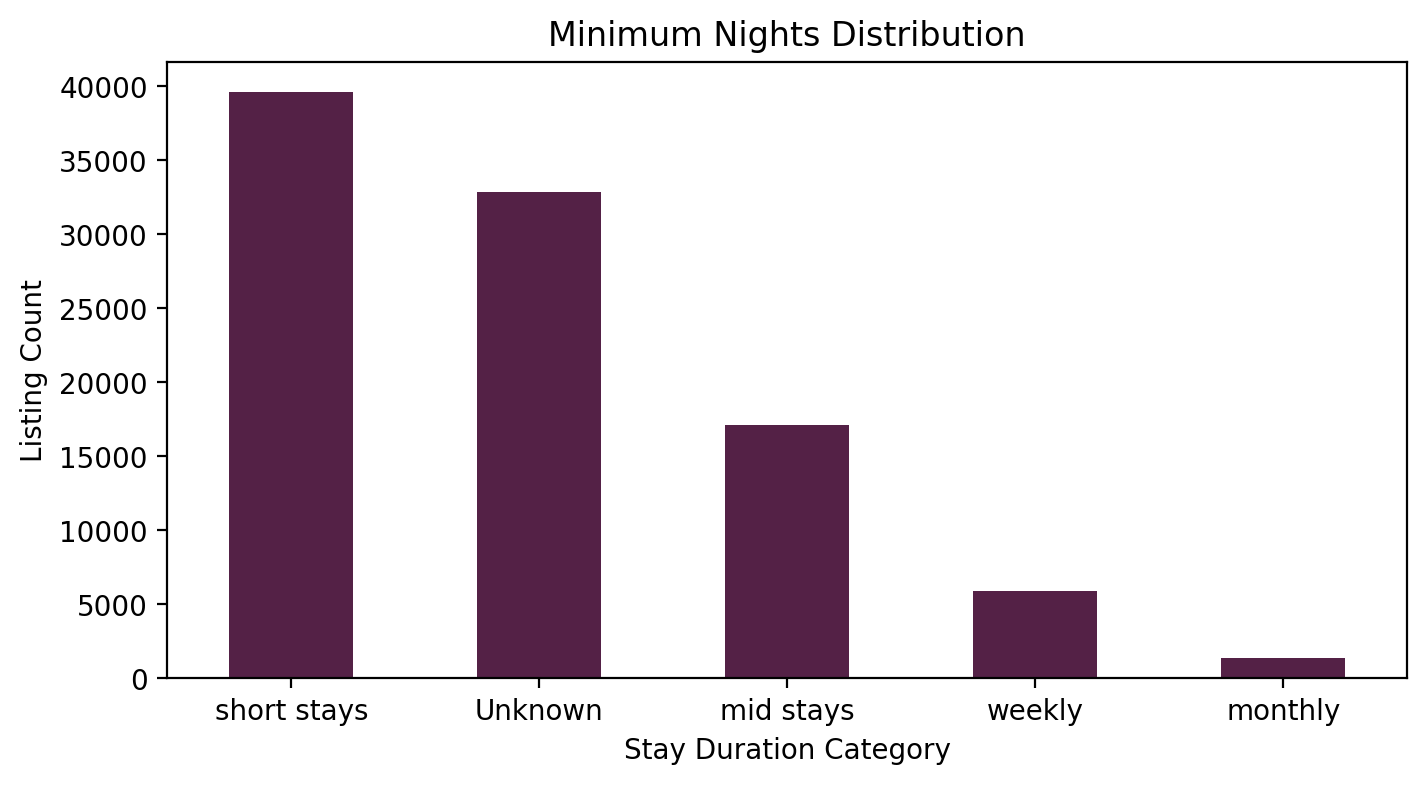

In [202]:
plt.rcParams['figure.dpi']=200
listings['minimum_nights_cat'].value_counts().plot(kind='bar', color='#542146', figsize=(8,4))
plt.title('Minimum Nights Distribution')
plt.xlabel('Stay Duration Category') 
plt.ylabel('Listing Count')
plt.xticks(rotation=0)

plt.show()

* The minimum_nights variable exhibits a highly right-skewed distribution with extreme values representing long-term rental listings. To improve interpretability and reduce the influence of rare outliers, the variable was grouped into meaningful stay-length categories reflecting common booking behaviors (short, mid-term, weekly, and monthly stays). This transformation supports robust aggregation, dashboarding, and downstream analysis.

**Before**

*bathrooms_text*

In [203]:
(
    listings.bathrooms.value_counts(dropna=True)
)

bathrooms
1.0     41164
2.0      9799
1.5      5127
2.5      2038
3.0      1539
0.5       727
3.5       567
0.0       356
4.0       284
4.5       135
5.0        95
6.0        87
5.5        45
10.0       11
6.5        11
7.0         8
8.0         7
8.5         2
9.0         2
12.0        2
15.0        2
12.5        1
7.5         1
14.0        1
26.0        1
18.0        1
11.5        1
20.0        1
24.0        1
13.5        1
Name: count, dtype: int64

**After**

In [204]:
def bathrooms_cat(df):
    df = df.copy()
    df["bathrooms_num"] = (
        df["bathrooms_text"]
        .str.extract(r"(\d+\.?\d*)")
        .astype(float))
    
    bins = [0, 1, 2, 3, 5, float("inf")]
    labels = ["1_or_less", "2", "3", "4", "5_plus"]
    
    df["bathrooms_group"] = pd.cut(
        df["bathrooms_num"],
        bins=bins,
        labels=labels,
        include_lowest=True)
    return df

listings = bathrooms_cat(listings)

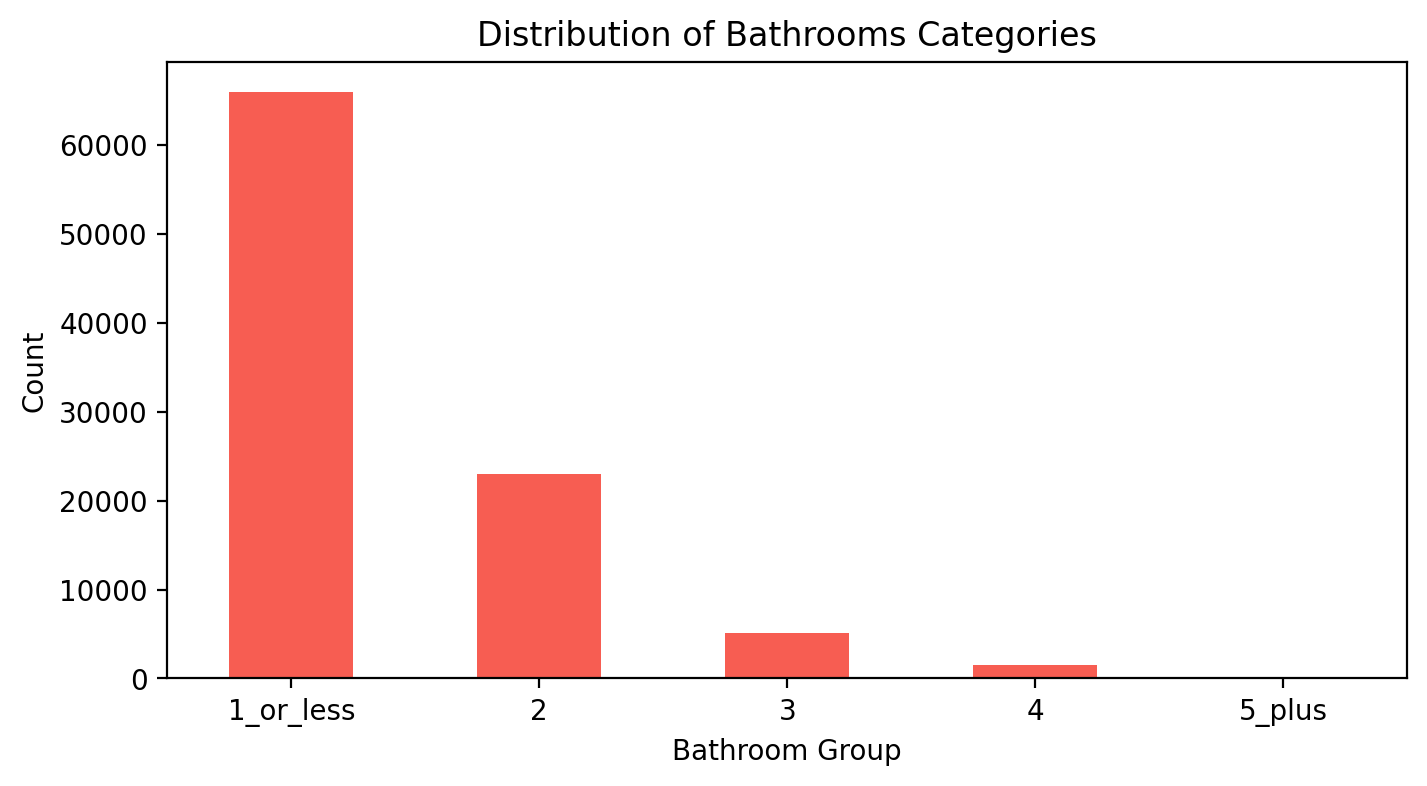

In [205]:
plt.rcParams['figure.dpi'] = 200
listings.bathrooms_group.value_counts().plot(kind='bar', 
                                             color='#f75d52', 
                                             figsize=(8,4))
plt.title('Distribution of Bathrooms Categories')
plt.xlabel('Bathroom Group')
plt.ylabel('Count')

plt.xticks(rotation=0)
plt.show()

* Bathroom information was originally provided as free-text with many rare categories. For consistency and analytical clarity, numeric bathroom counts were extracted and grouped into a small number of interpretable categories. This reduced sparsity and improved readability while preserving the underlying information.

## 7. Null handling 

**Before**

*bathrooms*

In [206]:
(
    listings[['bathrooms']].describe() 
)

,bathrooms
count,62017.000000
mean,1.354951
std,0.718883
min,0.000000
25%,1.000000
50%,1.000000
75%,1.500000
max,26.000000


**After**

In [207]:
def bathroom_mask(df):
    df = df.copy()
    df['bathrooms'] = df['bathrooms'].replace(0, np.nan)
    return df
listings = bathroom_mask(listings)

In [208]:
(
    listings[['bathrooms']]
    .describe()
    .round(2) 
)

,bathrooms
count,61661.00
mean,1.36
std,0.71
min,0.50
25%,1.00
50%,1.00
75%,1.50
max,26.00


* There are many variable in Airbnb dataset that containing zero values. They were interpreted based on domain context. However, for many variables these zero values add analytical values. For example, for count and availability fields, zero represents a meaningful state (e.g. no reviews, no availability, no revenue) and was retained. A review score rating of zero has clear meaning when tied to zero reviews or no participants. Therefore, only values that were logically impossible were treated as missing such as *bathrooms*.
* Listings with zero bedrooms were retained, as they represent studio or open-plan units where no separate bedroom exists. 

## 8. Value Standardization And Corrections

**Before**

*hsot_verifications*

In [209]:
pd.DataFrame(
    listings.host_verifications.value_counts()
)

,count
host_verifications,
"['email', 'phone']",75800
"['email', 'phone', 'work_email']",10997
['phone'],9110
"['phone', 'work_email']",401
['email'],319
"['email', 'work_email']",99
[],93
"['email', 'phone', 'photographer']",2


* The host_verifications field contains multiple verification types stored as string-encoded lists, making direct analysis and visualization difficult. To standardize this field, verification types were extracted into separate binary indicators (e.g. email, phone, work email). This preserves all available information.

**After**

In [210]:
listings['host_verifications'] = (listings['host_verifications']
                 .str.replace(r'[\[\]]', '', regex=True)  
                 .str.replace("'", '', regex=False)       
                 .str.replace(',', ' & ', regex=False))   


pd.DataFrame(
    listings.host_verifications.value_counts()
)

,count
host_verifications,
email & phone,75800
email & phone & work_email,10997
phone,9110
phone & work_email,401
email,319
email & work_email,99
,93
email & phone & photographer,2


**Before**

*host_response_time*

In [211]:
listings.host_response_time.value_counts()

host_response_time
within an hour        43447
within a few hours    10683
within a day           6726
a few days or more     4300
Name: count, dtype: int64

* These values are long, inconsistent in structure, and slightly awkward to use in plots, tables, or models. Therefore, the values are standardized into concise, consistently formatted labels to improve readability and analytical usability.

In [212]:
def mapping(df):
    map = {
    "within an hour": "within_1_hour",
    "within a few hours": "within_few_hours",
    "within a day": "within_1_day",
    "a few days or more": "few_days_or_more"}
    df = df.copy()
    df["host_response_time"] = df["host_response_time"].map(map)
    return df
listings = mapping(listings)

pd.DataFrame(
    listings.host_response_time.value_counts()
)

,count
host_response_time,
within_1_hour,43447
within_few_hours,10683
within_1_day,6726
few_days_or_more,4300


## 9. Outlier Detection Treatment

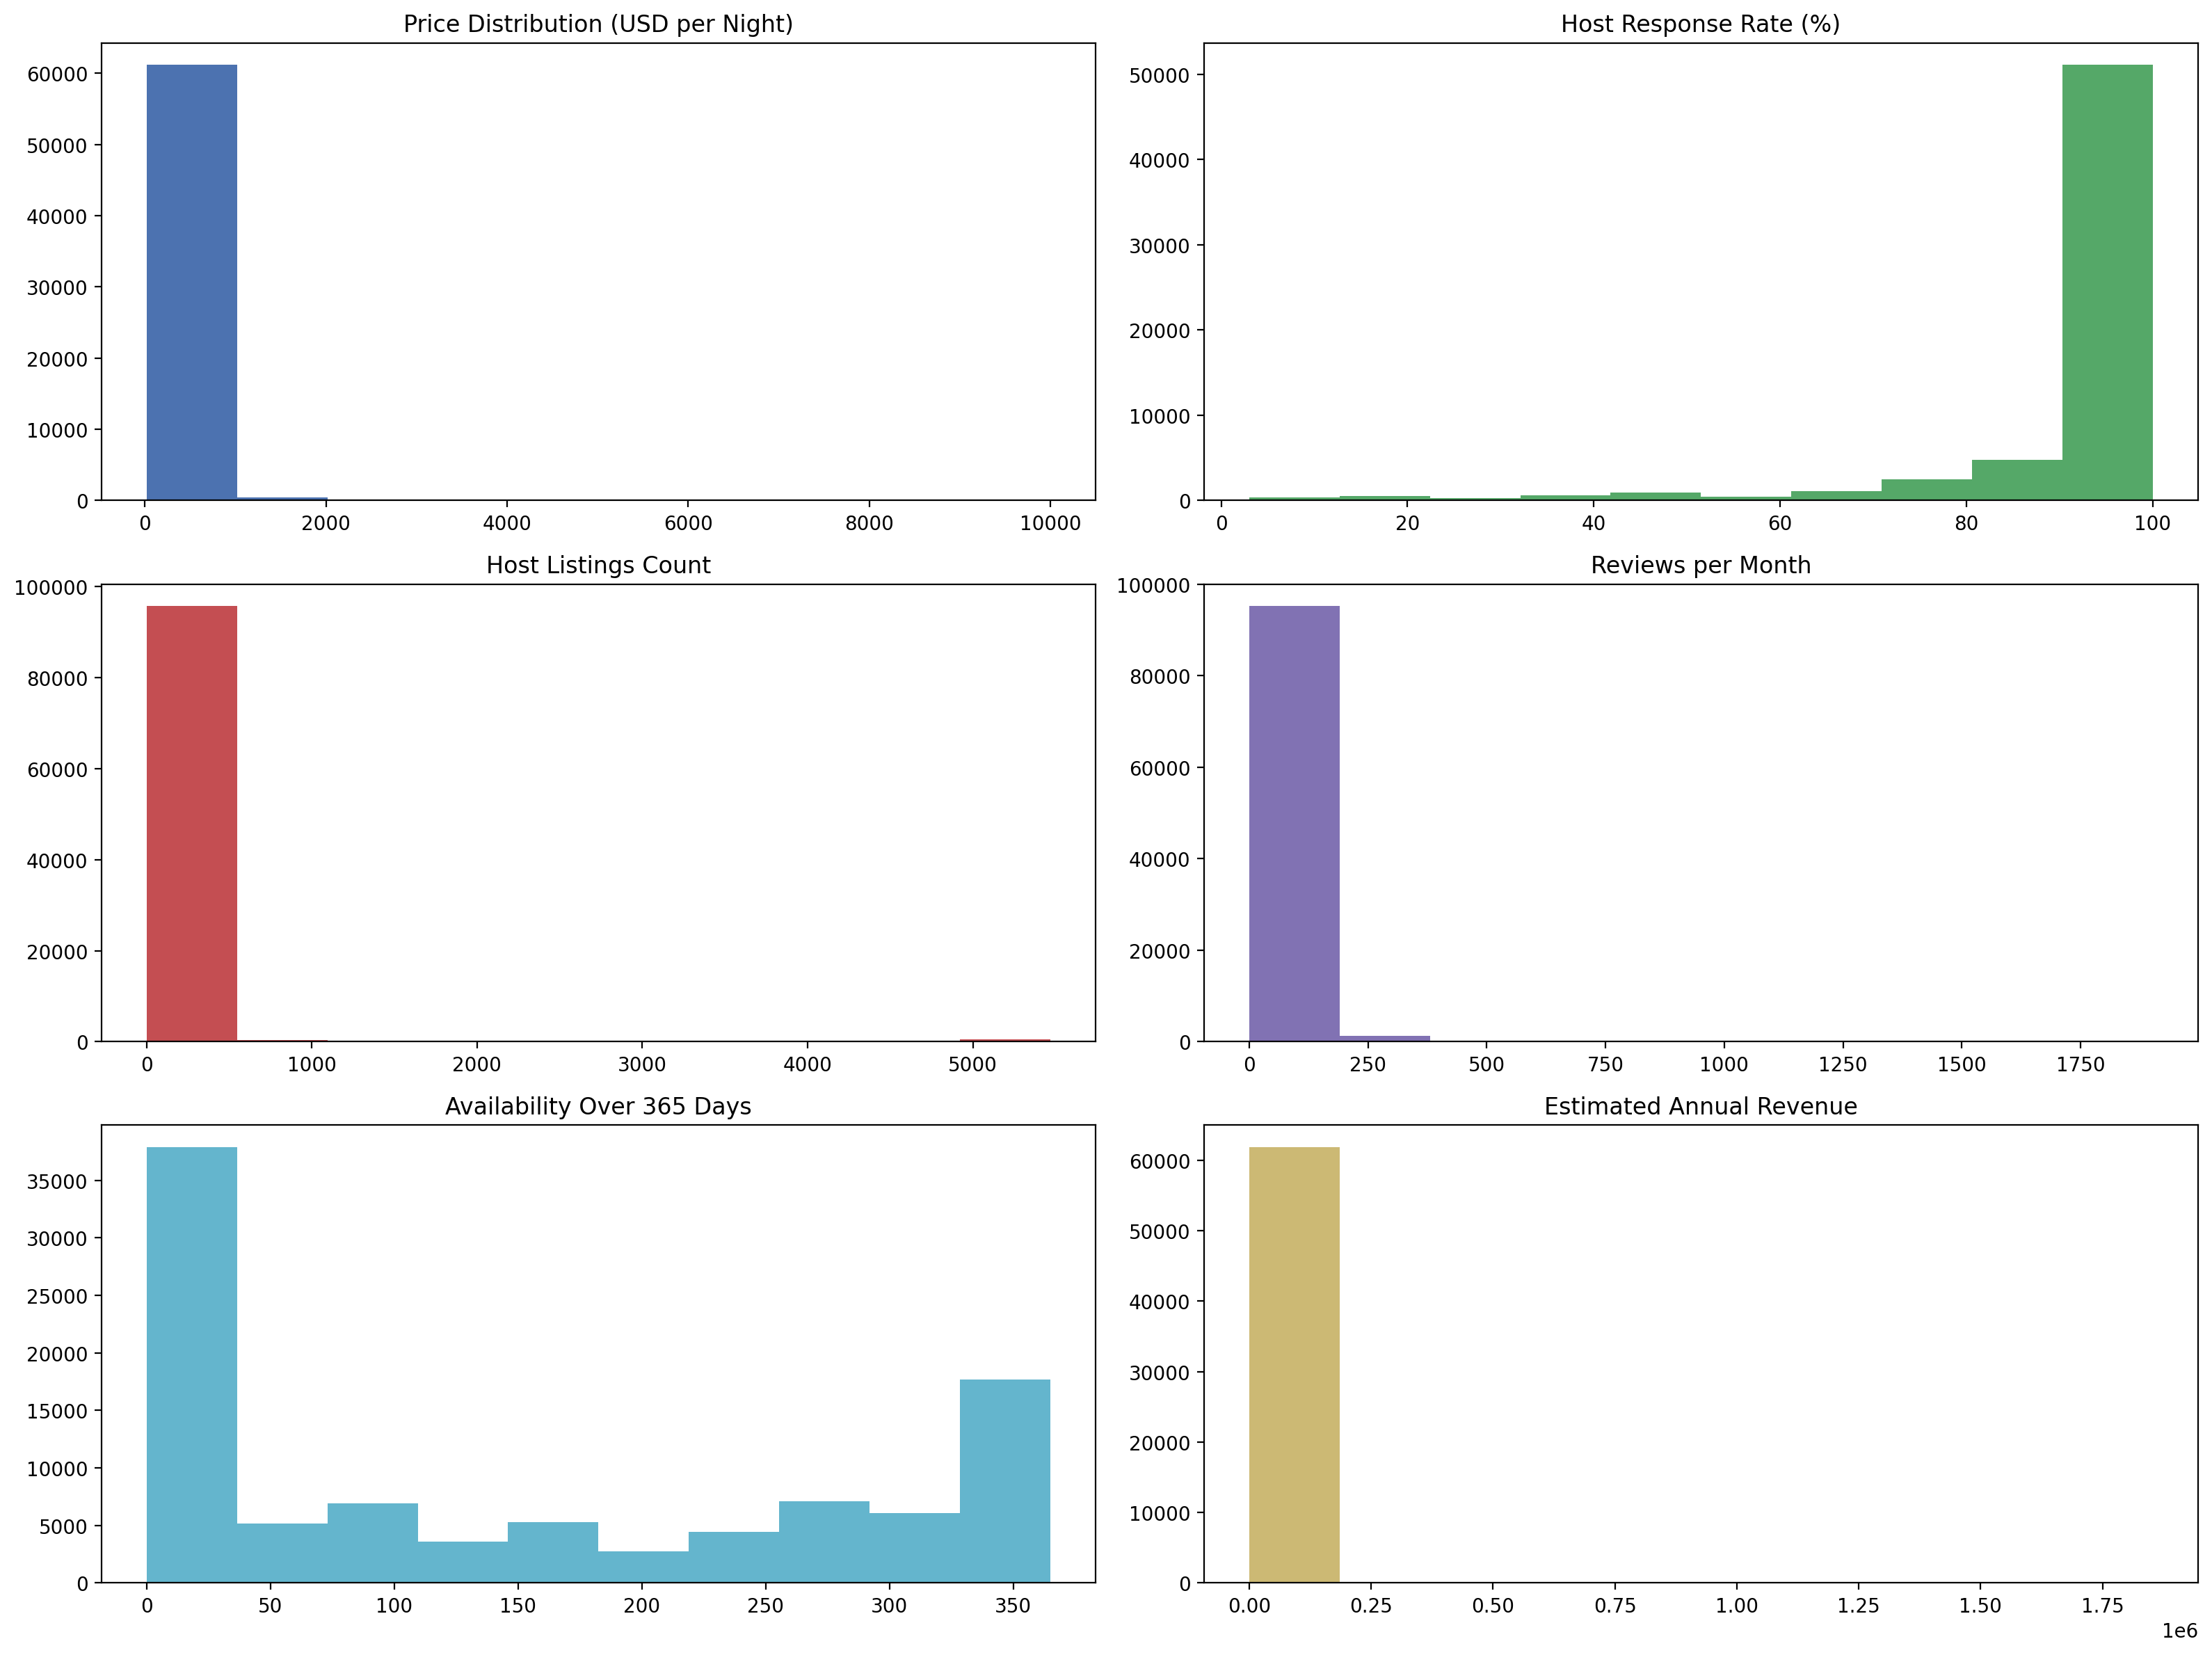

In [213]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, axes = plt.subplots(3, 2, figsize=(16, 12), dpi=200)

axes = axes.flatten()

axes[0].hist(listings['price'], color='#4C72B0')
axes[0].set_title('Price Distribution (USD per Night)')

axes[1].hist(listings['host_response_rate'], color='#55A868')
axes[1].set_title('Host Response Rate (%)')

axes[2].hist(listings['host_listings_count'], color='#C44E52')
axes[2].set_title('Host Listings Count')

axes[3].hist(listings['number_of_reviews'], color='#8172B3')
axes[3].set_title('Reviews per Month')

axes[4].hist(listings['availability_365'], color='#64B5CD')
axes[4].set_title('Availability Over 365 Days')

axes[5].hist(listings['estimated_revenue_l365d'], color='#CCB974')
axes[5].set_title('Estimated Annual Revenue')

plt.tight_layout()
plt.show()


* The distributions show strong right skew across several key variables, especially price, estimated revenue, and availability-related metrics, where a small number of listings extend far beyond the majority of observations. This is most visible in the price distribution, which ranges from budget accommodations to very high nightly rates. In a hospitality market like Airbnb, this spread is expected and reflects real differences in property types, such as luxury homes, premium short-term rentals, and professionally managed listings. Likewise, unusually high revenue, availability, or review counts typically indicate highly active or high-performing hosts rather than data issues.

* Given the large number of variables, outlier analysis was not applied uniformly across all features. Instead, attention was focused on variables with the greatest analytical relevance, while those with limited interpretability or minimal impact on the research goals were deprioritized. In some cases, extreme values had already been addressed through categorization—for example, grouping minimum night stays into meaningful ranges to account for listings targeting long-term guests. After review, the remaining outliers were considered valid reflections of real market behavior and were intentionally retained.

## 10. Validation and Dataset Integrity Checks

In [215]:
print('\033[92m=== SHAPE OF DATASET ===\033[0m')
row, col = listings.shape; print(f"Rows: {row}"), print(f"Columns: {col}")
print(f"Memory Usage:{listings.memory_usage(deep=True).sum() /1024**2:.2f} MB")

print('\033[92m_\033[0m'*100)
print("\033[92mData Validation Summary\033[0m".center(100))
print('\033[92m_\033[0m'*100)

summary = pd.DataFrame({
    'DataType': listings.dtypes,
    'Non-Null': listings.count(),
    'Null': listings.isnull().sum(),
    'Null%': (listings.isnull().sum() / len(listings) * 100).round(2),
    'Unique': listings.nunique(),
    'Duplicates': listings.duplicated().sum()
})

pd.set_option("display.max_rows", 100)
summary

=== SHAPE OF DATASET ===
Rows: 96862
Columns: 68
Memory Usage:145.54 MB
____________________________________________________________________________________________________
                                  Data Validation Summary                                  
____________________________________________________________________________________________________


,DataType,Non-Null,Null,Null%,Unique,Duplicates
last_scraped,datetime64[ns],96862,0,0.00,5,0
name,object,96862,0,0.00,93340,0
host_id,int64,96862,0,0.00,55646,0
host_name,object,96819,43,0.04,16672,0
host_since,datetime64[ns],96821,41,0.04,5489,0
host_response_time,object,65156,31706,32.73,4,0
host_response_rate,float64,62718,34144,35.25,91,0
host_acceptance_rate,float64,69102,27760,28.66,101,0
host_is_superhost,boolean,95096,1766,1.82,2,0
host_listings_count,float64,96821,41,0.04,147,0


## 11. Conclusion

This data cleaning project transformed a large, raw Airbnb dataset into a more streamlined and analytically robust resource. The dataset was reduced from 96,871 to 96,862 rows—a negligible loss of about 0.01%—while the number of columns dropped from 79 to 68. At the same time, memory usage fell by roughly 65%, from 394.52 MB to 145.54 MB, significantly improving efficiency and usability.

Importantly, these gains were achieved without sacrificing meaningful information. Columns were removed only when they offered little analytical value in their raw form, such as identifiers, URLs, system metadata, or unstructured text fields that would require advanced natural language processing to be useful. Missing values were handled based on their semantic meaning rather than rigid thresholds, helping preserve informative patterns related to listing maturity, host activity, and market participation.

Outlier handling was guided by domain logic rather than purely statistical rules. Extreme values that reflected genuine market behavior—such as professional hosts managing large portfolios—were retained and, where appropriate, re-expressed through categorization to improve interpretability. In contrast, values that were logically implausible or clearly distorted, such as unrealistic prices or stay-length constraints, were adjusted or masked to avoid analytical bias.

Several stay-length variables capture overlapping booking constraints in the dataset. While these fields serve similar purposes, minimum_nights most directly shapes guest booking behavior. As a result, categorization focused on this variable, while related fields were kept in cleaned numeric form.

Overall, this project demonstrates a structured, context-aware approach to data cleaning that balances rigor with realism. The final dataset is well suited for exploratory analysis, visualization, and modeling, and the documented workflow reflects professional data preparation standards relevant to real-world analytical work.

## 12. References

Inside Airbnb. London, England, United Kingdom. File Name: listings.csv.gz. retrieved from: https://insideairbnb.com/get-the-data/
